# Image Wavlet Compression

Artash Nath, Pay-Elec UTAT

In [1]:
# Importing Neccesary Libaries

import pywt # For wavlets
import numpy # Handling Array Data
import numpy as np # ^
from PIL import Image # Image Operations
import cv2 # More Image Operations
import matplotlib.pyplot as plt # Plots and displays
from skimage.io import imread # Even more image operations

In [2]:
# Calculate pixel simmilarity between 2 arrays of same size

def image_simmilarity(imageA, imageB):
    
    diff = abs(imageA - imageB) # Find difference between 2 images
    
    err = diff.mean() # Calculate Average Difference between those 2 images
    
    return err

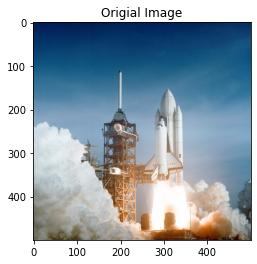

In [11]:
im = cv2.resize(imread('rocket.jpg')[:1000, :1000], (500,500) )# Read Sample Image
plt.title("Origial Image")
plt.imshow(im)

In [4]:
# Breaking into RED, GREEN, BLUE
r = im[:,:,0]
g = im[:,:,1]
b = im[:,:,2]

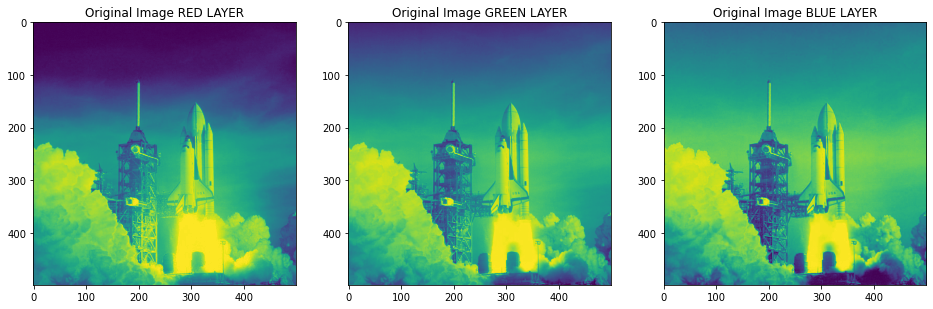

In [13]:
plt.figure(figsize=(16, 8))


plt.subplot(131)
plt.title("Original Image RED LAYER")
plt.imshow(r)

plt.subplot(132)
plt.title("Original Image GREEN LAYER")
plt.imshow(g)

plt.subplot(133)
plt.title("Original Image BLUE LAYER")
plt.imshow(b)

## Extracting Wavlet Coefficients

In [14]:
# Calculating wavlets for each image layer
r_coeff = pywt.dwt2(r, 'haar')
g_coeff = pywt.dwt2(g, 'haar')
b_coeff = pywt.dwt2(b, 'haar')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


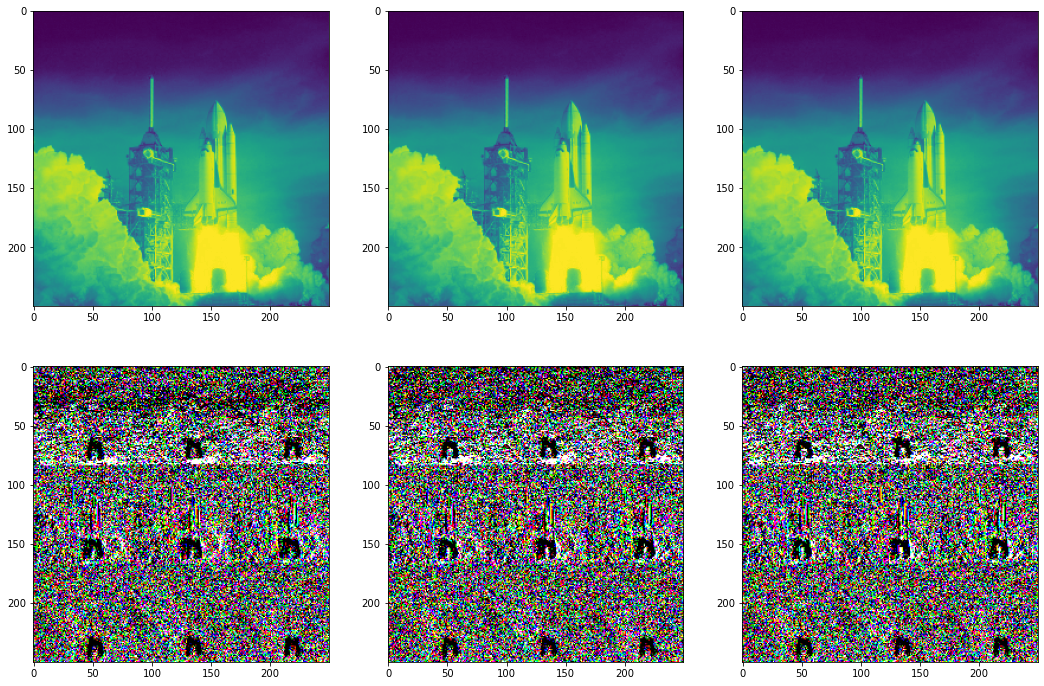

In [15]:
# Displaying Coefficients for each image
plt.figure(figsize=(18, 12))

plt.subplot(231)
plt.imshow(r_coeff[0])

plt.subplot(232)
plt.imshow(r_coeff[0])

plt.subplot(233)
plt.imshow(r_coeff[0])

#############################

plt.subplot(234)
plt.imshow(np.reshape(r_coeff[1], (250,250,3)))

plt.subplot(235)
plt.imshow(np.reshape(g_coeff[1], (250,250,3)))

plt.subplot(236)
plt.imshow(np.reshape(b_coeff[1], (250,250,3)))



In [29]:
r_coeff[0].nbytes

500000

In [27]:
im.nbytes

750000

## Reconstructing Image from Wavlets

In [16]:
reconstructed_r = pywt.idwt2(r_coeff, 'haar')
reconstructed_g = pywt.idwt2(g_coeff, 'haar')
reconstructed_b = pywt.idwt2(b_coeff, 'haar')

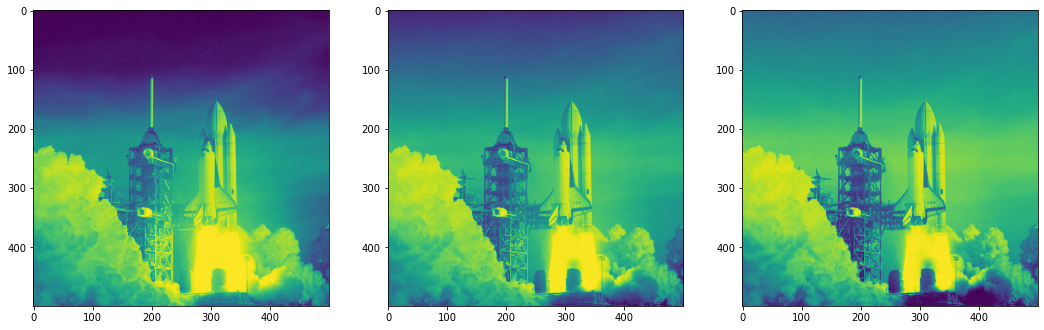

In [17]:
# Displaying Coefficients for each image
plt.figure(figsize=(18, 12))

plt.subplot(231)
plt.imshow(reconstructed_r)

plt.subplot(232)
plt.imshow(reconstructed_g)

plt.subplot(233)
plt.imshow(reconstructed_b)

############################

In [21]:
reconstructed_image = np.stack([r,g,b], axis=2)

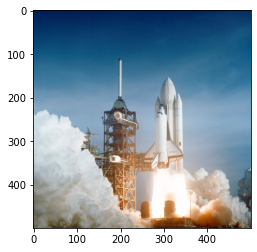

In [22]:
plt.imshow(reconstructed_image)

In [23]:
image_simmilarity(im, reconstructed_image)

0.0